# CS6140 - Machine Learning: Assignment 4 


# Q1. Expectation Maximization (25 Points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1, 𝜎_1^2) and 𝑁(𝜇2, 𝜎_2^2).

There are 5 paramaters to estimate: $𝜃=(𝑤, 𝜇1, 𝜎_1^2, 𝜇2, 𝜎_2^2)$ where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.

The probability density function (PDF) of the mixture model is: $𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎_1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎_2^2)$
Your goal is to best fit a given probability density by finding $𝜃=(𝑤,𝜇1,𝜎_1^2,𝜇2,𝜎_2^2)$ through EM iterations.

Using the following way to produce data:

In [1]:
import numpy as np
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)


In [2]:
print(data)

[ 0.64539892  0.97705513  2.20458457 ...  9.47249572 10.30057834
  7.56125543]


(1) Using a single Gaussion to estimate and create a plot to see the result: (10 points)


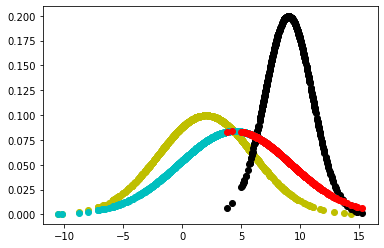

Yellow is the first truth.
Black is the second truth.
Cyan and red are the estimated Gaussian.


In [3]:
#Using a single Gaussion to estimate and create a plot to see the result: (10 points)
#THE ABOVE IS UNINTERPRETABLE - IT IS NOT OKAY FOR HOMEWORK QUESTIONS TO BE UNINTERPRETABLE
import matplotlib.pyplot as plt

class Gaussian:
#"Model univariate Gaussian"
  def __init__(self, mu, sigma):
    #mean and standard deviation
    self.mu = mu
    self.sigma = sigma

#probability density function
  def pdf(self, datum):
    prob = np.exp(-0.5*np.power(((datum-self.mu)/self.sigma),2))/(self.sigma*np.sqrt(2*np.pi))
    return prob

myGauss = Gaussian(np.mean(data), np.std(data))
probs = np.zeros(len(data))
for i in range(len(data)):
  probs[i] = myGauss.pdf(data[i])

gauss1 = Gaussian(Mean1, Standard_dev1)
gauss2 = Gaussian(Mean2, Standard_dev2)
plt.scatter(y1, gauss1.pdf(y1), c='y')
plt.scatter(y2, gauss2.pdf(y2), c='k')
plt.scatter(y1, myGauss.pdf(y1), c='c')
plt.scatter(y2, myGauss.pdf(y2), c ='r')
plt.show()
print('Yellow is the first truth.')
print('Black is the second truth.')
print('Cyan and red are the estimated Gaussian.')

(2) Using a 2 Gaussian mixture model to estimate and create a plot to see the result(Do not use sklearn GaussianMixture): (15 points)


Final Loglikelihood
-4404.220106527785
Weight to First Gaussian
0.5102472824434107
Gaussian 1:
0.83 vs. 2.0
3.38 vs. 4.0
Gaussian 2:
8.22 vs. 9.0
2.52 vs. 2.0


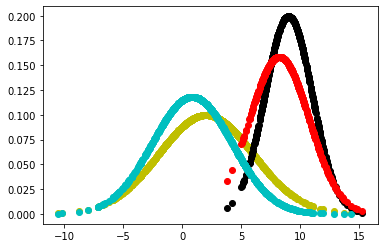

Yellow is the first truth.
Black is the second truth.
Cyan and red are the estimated Gaussians.


In [4]:
import math
class GaussianMixture_self:
#"Model mixture of two univariate Gaussians and their EM estimation"

  def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
    self.data = data
    self.mu_min = mu_min
    self.mu_max = mu_max
    self.sigma_min = sigma_min
    self.sigma_max = sigma_max
    self.mix = mix

  def Estep(self):
    #"Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
    probs = np.zeros((len(data),2))

    for i in range(len(self.data)):
      prob1 = self.pdf(self.data[i], self.mu_min, self.sigma_min)
      prob2 = self.pdf(self.data[i], self.mu_max, self.sigma_max)
      probs[i,0] = prob1/(prob1 + prob2)
      probs[i,1] = prob2/(prob1 + prob2)

    return probs

  def Mstep(self, probs):
    #"Perform an M(aximization)-step"
    #Get weights
    w1 = sum(probs[:,0])
    w2 = sum(probs[:,1])
    self.mix = w1/len(probs)
    self.mu_min = (1/w1)*np.dot(probs[:,0], self.data)
    self.mu_max = (1/w2)*np.dot(probs[:,1], self.data)
    self.sigma_min = math.sqrt((1/w1)*np.dot(probs[:,0], np.power(self.data-self.mu_min,2)))
    self.sigma_max = math.sqrt((1/w2)*np.dot(probs[:,1], np.power(self.data-self.mu_max,2)))

  def iterate(self, N=1, verbose=False):
    #"Perform N iterations, then compute log-likelihood"
    for i in range(N):
      probs = self.Estep()
      self.Mstep(probs)
    
    logllh = 0
    for i in range(len(self.data)):
      temp = 0
      for j in range(2):
        if j == 0:
          temp += self.mix*self.pdf(self.data[i], self.mu_min, self.sigma_min)
        else:
          temp += (1-self.mix)*self.pdf(self.data[i], self.mu_max, self.sigma_max)
      logllh += math.log(temp)
    #calculate the log-likelihood
    print('Final Loglikelihood')
    print(logllh)

  def pdf(self, x, mu, sigma):
    prob = np.exp(-0.5*np.power(((x - mu)/sigma),2))/(sigma*np.sqrt(2*np.pi))
    return prob

  def pdf_whole(self, x):
    prob1 = np.exp(-0.5*np.power(((x-self.mu_min)/self.sigma_min),2))/(self.sigma_min*np.sqrt(2*np.pi))
    prob2 = np.exp(-0.5*np.power(((x-self.mu_max)/self.sigma_max),2))/(self.sigma_max*np.sqrt(2*np.pi))

    return (self.mix)*prob1 + (1-self.mix)*prob2

mix = GaussianMixture_self(data, min(data), max(data))
mix.iterate(100)
print('Weight to First Gaussian')
print(mix.mix)
print('Gaussian 1:')
print(str(round(mix.mu_min,2))   + ' vs. ' + str(Mean1))
print(str(round(mix.sigma_min,2)) + ' vs. ' + str(Standard_dev1))
print('Gaussian 2:')
print(str(round(mix.mu_max,2)) + ' vs. ' + str(Mean2))
print(str(round(mix.sigma_max,2)) + ' vs. ' + str(Standard_dev2))

gauss1 = Gaussian(Mean1, Standard_dev1)
gauss2 = Gaussian(Mean2, Standard_dev2)
plt.scatter(y1, gauss1.pdf(y1), c='y')
plt.scatter(y2, gauss2.pdf(y2), c='k')
plt.scatter(y1, mix.pdf(y1,mix.mu_min, mix.sigma_min), c='c')
plt.scatter(y2, mix.pdf(y2, mix.mu_max, mix.sigma_max), c ='r')
plt.show()
print('Yellow is the first truth.')
print('Black is the second truth.')
print('Cyan and red are the estimated Gaussians.')

# Q2. (65 Points)
Comparison for Logistic Regression model: before and after PCA.
Consider dataset.csv.
Please follow the following steps:

  1. Standardize the disease classification dataset (dataset.csv). You can use StandardScaler of sklearn. (5 points)
  2. Split the data in 80-20 train-val sets. Apply Eigen-decomposition using PCA **only** on train set. You can use externel libaries such as numpy (Ref np.linalg.eig) (10 points)
  3. Selection first 6 component loadings with the highest variance-explanation) (10 points)
  4. Project train set in the new 6-dimensional feature space using eigen vectors selected in step 3. (10 points)
  5. Train two logistic regression models. One for the standardized (all features) and second for the transformed data (6-features). Report train-sets (standardized and transformed) ROC curves for both models. (10 Points)
  6. Validate the model using val set. Project val set in the new 6-dimensional feature space using eigen vectors selected in step 3. Predict target variable using the models trained in step 5. (10 Points)
  7. Compare the logistic regression models before and after PCA using ROC curve. (5 points)

In [5]:
#imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
#load in and standardize the disease classification dataset
df = pd.read_csv('/content/dataset.csv')
data = df.to_numpy()
stand_data = data.copy()

#remove labels
labels = stand_data[:,-1]
stand_data = stand_data[:,0:-1]

for i in range(len(stand_data[0])):
  scaler = StandardScaler()
  temp = (stand_data[:,i]).reshape(-1,1)

  scaler.fit(temp)
  new_temp = scaler.transform(temp)
  stand_data[:,i] = new_temp.reshape(len(stand_data),)

In [7]:
#split the data 
x_train, x_test, y_train, y_test = train_test_split(stand_data, labels, test_size = 0.2)
print(np.shape(x_train))
print(np.shape(x_test))

(604, 754)
(152, 754)


In [8]:
#apply eigen-decomp using PCA on train set
#AGAIN WITH BAD INSTRUCTIONS, you cannot use np.linalg.eig on a non-square matrix
#I am instead using SVD from sklearn's decomposition.PCA library
#THIS AUTOMATICALLY SELECTS THE 6 BEST COMPONENTS
#AND AUTOMATICALLY TRANSFORMS THE DATA INTO THAT SPACE
pca = PCA(n_components = 6)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
trans_x_train = pca.transform(x_train)
print(np.shape(x_train))
print(np.shape(trans_x_train))

[0.12762978 0.09390239 0.08423503 0.04632483 0.03847    0.02993396]
[240.77440422 206.52499494 195.60532026 145.05784596 132.18901641
 116.6047844 ]
(604, 754)
(604, 6)


In [9]:
from sklearn.linear_model import LogisticRegression
#train 2 logistic-regression models
#1. standardized
stand_lr = LogisticRegression(max_iter = 500) #more iterations required to converge than standard 100
stand_lr.fit(x_train, y_train)


LogisticRegression(max_iter=500)

In [10]:
#2. transformed
trans_lr = LogisticRegression()
trans_lr.fit(trans_x_train, y_train)

LogisticRegression()

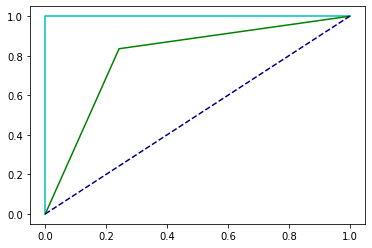

[[158   0]
 [  0 446]]
[[ 75  83]
 [ 24 422]]


In [11]:
#ROC training curves
stand_train_guess = stand_lr.predict(x_train)
stg1, stg2, _ = roc_curve(stand_train_guess, y_train)
trans_train_guess = trans_lr.predict(trans_x_train)
ttg1, ttg2, _ = roc_curve(trans_train_guess, y_train)
plt.plot(stg1, stg2, color="c")
plt.plot(ttg1, ttg2, color="g")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()
print(confusion_matrix(y_train,stand_train_guess))
print(confusion_matrix(y_train,trans_train_guess))

In [12]:
#validate both models using val set
stand_test_guess = stand_lr.predict(x_test)
trans_x_test = pca.transform(x_test)
trans_test_guess = trans_lr.predict(trans_x_test)

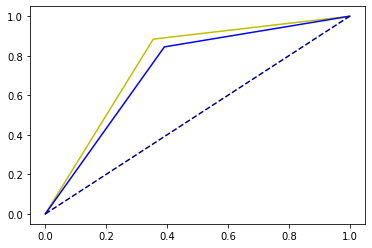

[[ 20  14]
 [ 11 107]]
[[ 14  20]
 [  9 109]]


In [13]:
#use ROC curve to compare the two models' performance
steg1, steg2, _ = roc_curve(stand_test_guess, y_test)
tteg1, tteg2, _ = roc_curve(trans_test_guess, y_test)
plt.plot(steg1, steg2, color="y")
plt.plot(tteg1, tteg2, color="b")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()
print(confusion_matrix(y_test,stand_test_guess))
print(confusion_matrix(y_test,trans_test_guess))

# Q3. (10 Points)
Outlier Detection using Z-score. (10 points)
You are given a Heights and Weights Dataset and a threshold 1. Calculate the number of outliar and show the first 5 of them.


In [14]:
# data heights and weights
df = pd.read_csv('/content/HeightWeight.csv')
hw = df.to_numpy()
print(df)

       Index  Height(Inches)  Weight(Pounds)
0          1        65.78331        112.9925
1          2        71.51521        136.4873
2          3        69.39874        153.0269
3          4        68.21660        142.3354
4          5        67.78781        144.2971
...      ...             ...             ...
24995  24996        69.50215        118.0312
24996  24997        64.54826        120.1932
24997  24998        64.69855        118.2655
24998  24999        67.52918        132.2682
24999  25000        68.87761        124.8742

[25000 rows x 3 columns]


In [15]:
#outliers by height
std_height = np.std(hw[:,1])
mean_height = np.mean(hw[:,1])
print('Mean: ' + str(mean_height))
print('Standard Deviation: ' + str(std_height))
height_outliers = []

for i in range(len(hw[:,1])):
  z = (hw[i,1] - mean_height) / std_height
  if abs(z) >= 3:
    height_outliers.append(hw[i,1])

print(str(len(height_outliers)) + ' outliers')
print('--First 5 Outliers--')
for i in range(5):
  print(height_outliers[i])

Mean: 67.99311359679999
Standard Deviation: 1.9016407372498432
51 outliers
--First 5 Outliers--
73.90107
73.83364
62.01666
74.24899
74.19488


In [16]:
#outliers by weight
std_weight = np.std(hw[:, 2])
mean_weight = np.mean(hw[:, 2])
print('Mean: ' + str(mean_weight))
print('Standard Deviation: ' + str(std_weight))
weight_outliers = []

for i in range(len(hw[:,2])):
  z = (hw[i,2] - mean_weight) / std_weight
  if abs(z) >= 3:
    weight_outliers.append(hw[i,2])

print(str(len(weight_outliers)) + ' outliers')
print('--First 5 Outliers--')
for i in range(5):
  print(weight_outliers[i])

Mean: 127.07942116080001
Standard Deviation: 11.66066434332078
69 outliers
--First 5 Outliers--
84.3598
168.229
162.4109
83.08527
162.8737
